Project: Problem Statement - Personal Loan Campaign Modelling
### Thera Bank Personal Loan Campaign
 
### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

### Domain:
Banking

 

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?
 

### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

### Steps and tasks:
- Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
- EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
- Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
- Give conclusion related to the Business understanding of your model? (5 marks)

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# turn off a warning that makes processing quicker:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#Format:
pd.options.display.float_format = '{:.2f}'.format

### Load and review data

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.shape

(5000, 14)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [5]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


#### Observations on Data Distribution for each variable

- ID column to be deleted as it is not needed for our model
- Age(numeric column) seems to be normally distributed as median and mean are almost similar (45 and 45.34)
- Experience(numeric column) seems to have -ve values (based on min value). Need to cleanup this column data. Also it seems to be normally distributed as median and mean are almost similar
- Income(numeric column) seems to be right skewed as mean is greater than median
- zipcode(Categorical column) can be removed. Let's see
- Family(Categorical column) where maximum size of a family in the given dataset is 4 and min is 1 and it is an oridnal cat. col
- CCAvg(Numeric column)  seems to be right skewed as mean is greater than median and 75% of people in the dataset spends <2.5K
- Education(categorical column) - It is an ordinal cat. column
- Mortgage(Numeric column) seems to be right skewed as mean is greater than median. Also 50% of dataset doesnt have mortgage
- Peronal Loan is our DEPENDENT or TARGET variable
- Securities Account, CD Account, Online, CreditCard are all Categorical columns

#### Categories of Features
- Nonimal Varibles :
    - ID, Zipcode
- Categorical Variables:
    - Ordinal:
        - Family
        - Education
    - Binary:
        - CD Account
        - Security Account
        - Online
        - Credit Card
- Numeric Variables:
    - Age
    - Experience
    - Income
    - CCAvg
    - Mortgage
    
##### Target variable is "Personal Loan"

#### Get the info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
numcols = ['Age', 'Experience', 'Income','CCAvg','Mortgage']
catcols = ['Family','Education','Securities Account','CD Account', 'Online', 'CreditCard']

#### Check for duplicates and nulls

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Observations
- No duplicates
- No NAs

#### Dropping ID column

In [11]:
df=df.drop('ID',axis=1)

#### As expreience column has -ve data, we need to replace it by median/mean or Absolute values

In [12]:
df[df['Experience']<0]['Experience'].count()

52

In [13]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,45.34,20.13,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,11.46,11.42,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,23.00,0.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [14]:
print('Mean for Experience is:' + str(df['Experience'].mean()))
print('Median for experience is:' + str(df['Experience'].median()))

Mean for Experience is:20.1346
Median for experience is:20.0


#### Checking for other columns if any has zero values

In [15]:
df[(df['Age']==0)| (df['Income']==0) | (df['ZIP Code']==0) | (df['Family']==0)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [16]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### Check for unique data: (Number of unique in each column?)

In [17]:
# Check for unique data in each column:
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### View distributions of variables

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

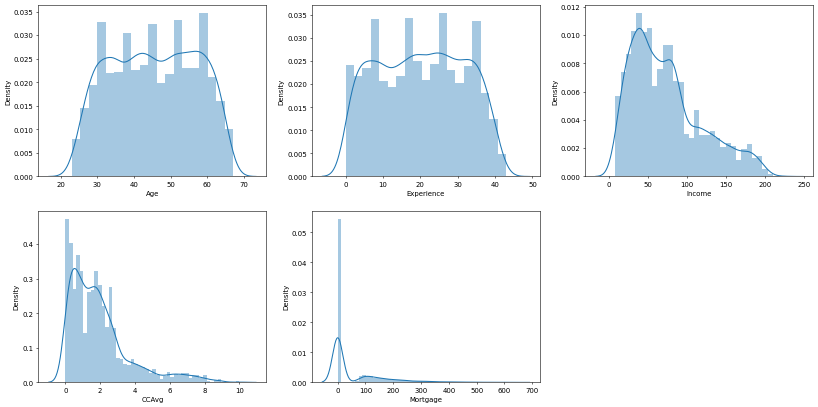

In [18]:
# univariate analysis for continuous variable
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[numcols[i]])
    plt.xlabel(numcols[i])
    

# plt.rcParams["figure.figsize"] = (16,14)
# df[numcols].hist();

#### Observations
- Age & Experience seems to be normally distributed
- Income, CC Average & Mortgage are right skewed 
- Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K
- Very few customers whose monthly avg. spending on credit card is more than 8K
- Most of the customers do not have mortgage
- Very few customers whos mortgage amount is more than 400K

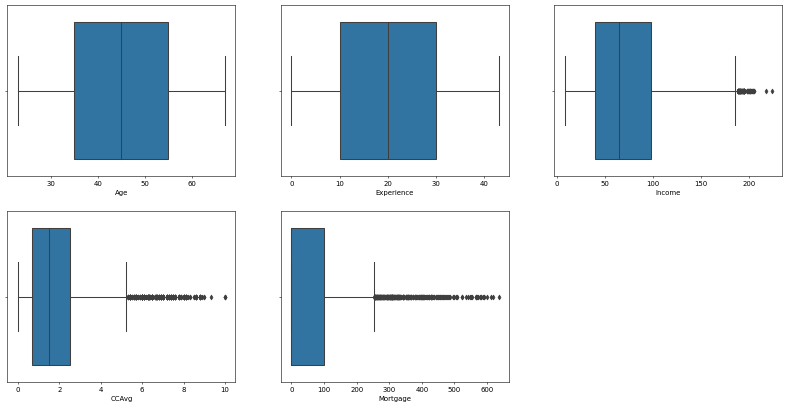

In [19]:
# Check for outliers using boxplot for numerical variables
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x= df[numcols[i]]);

#### Observations
- Age & Experience seems to be normally distributed
- Income, CC Average & Mortgage are right skewed 
- CC Average & Mortgage have lot of outliers

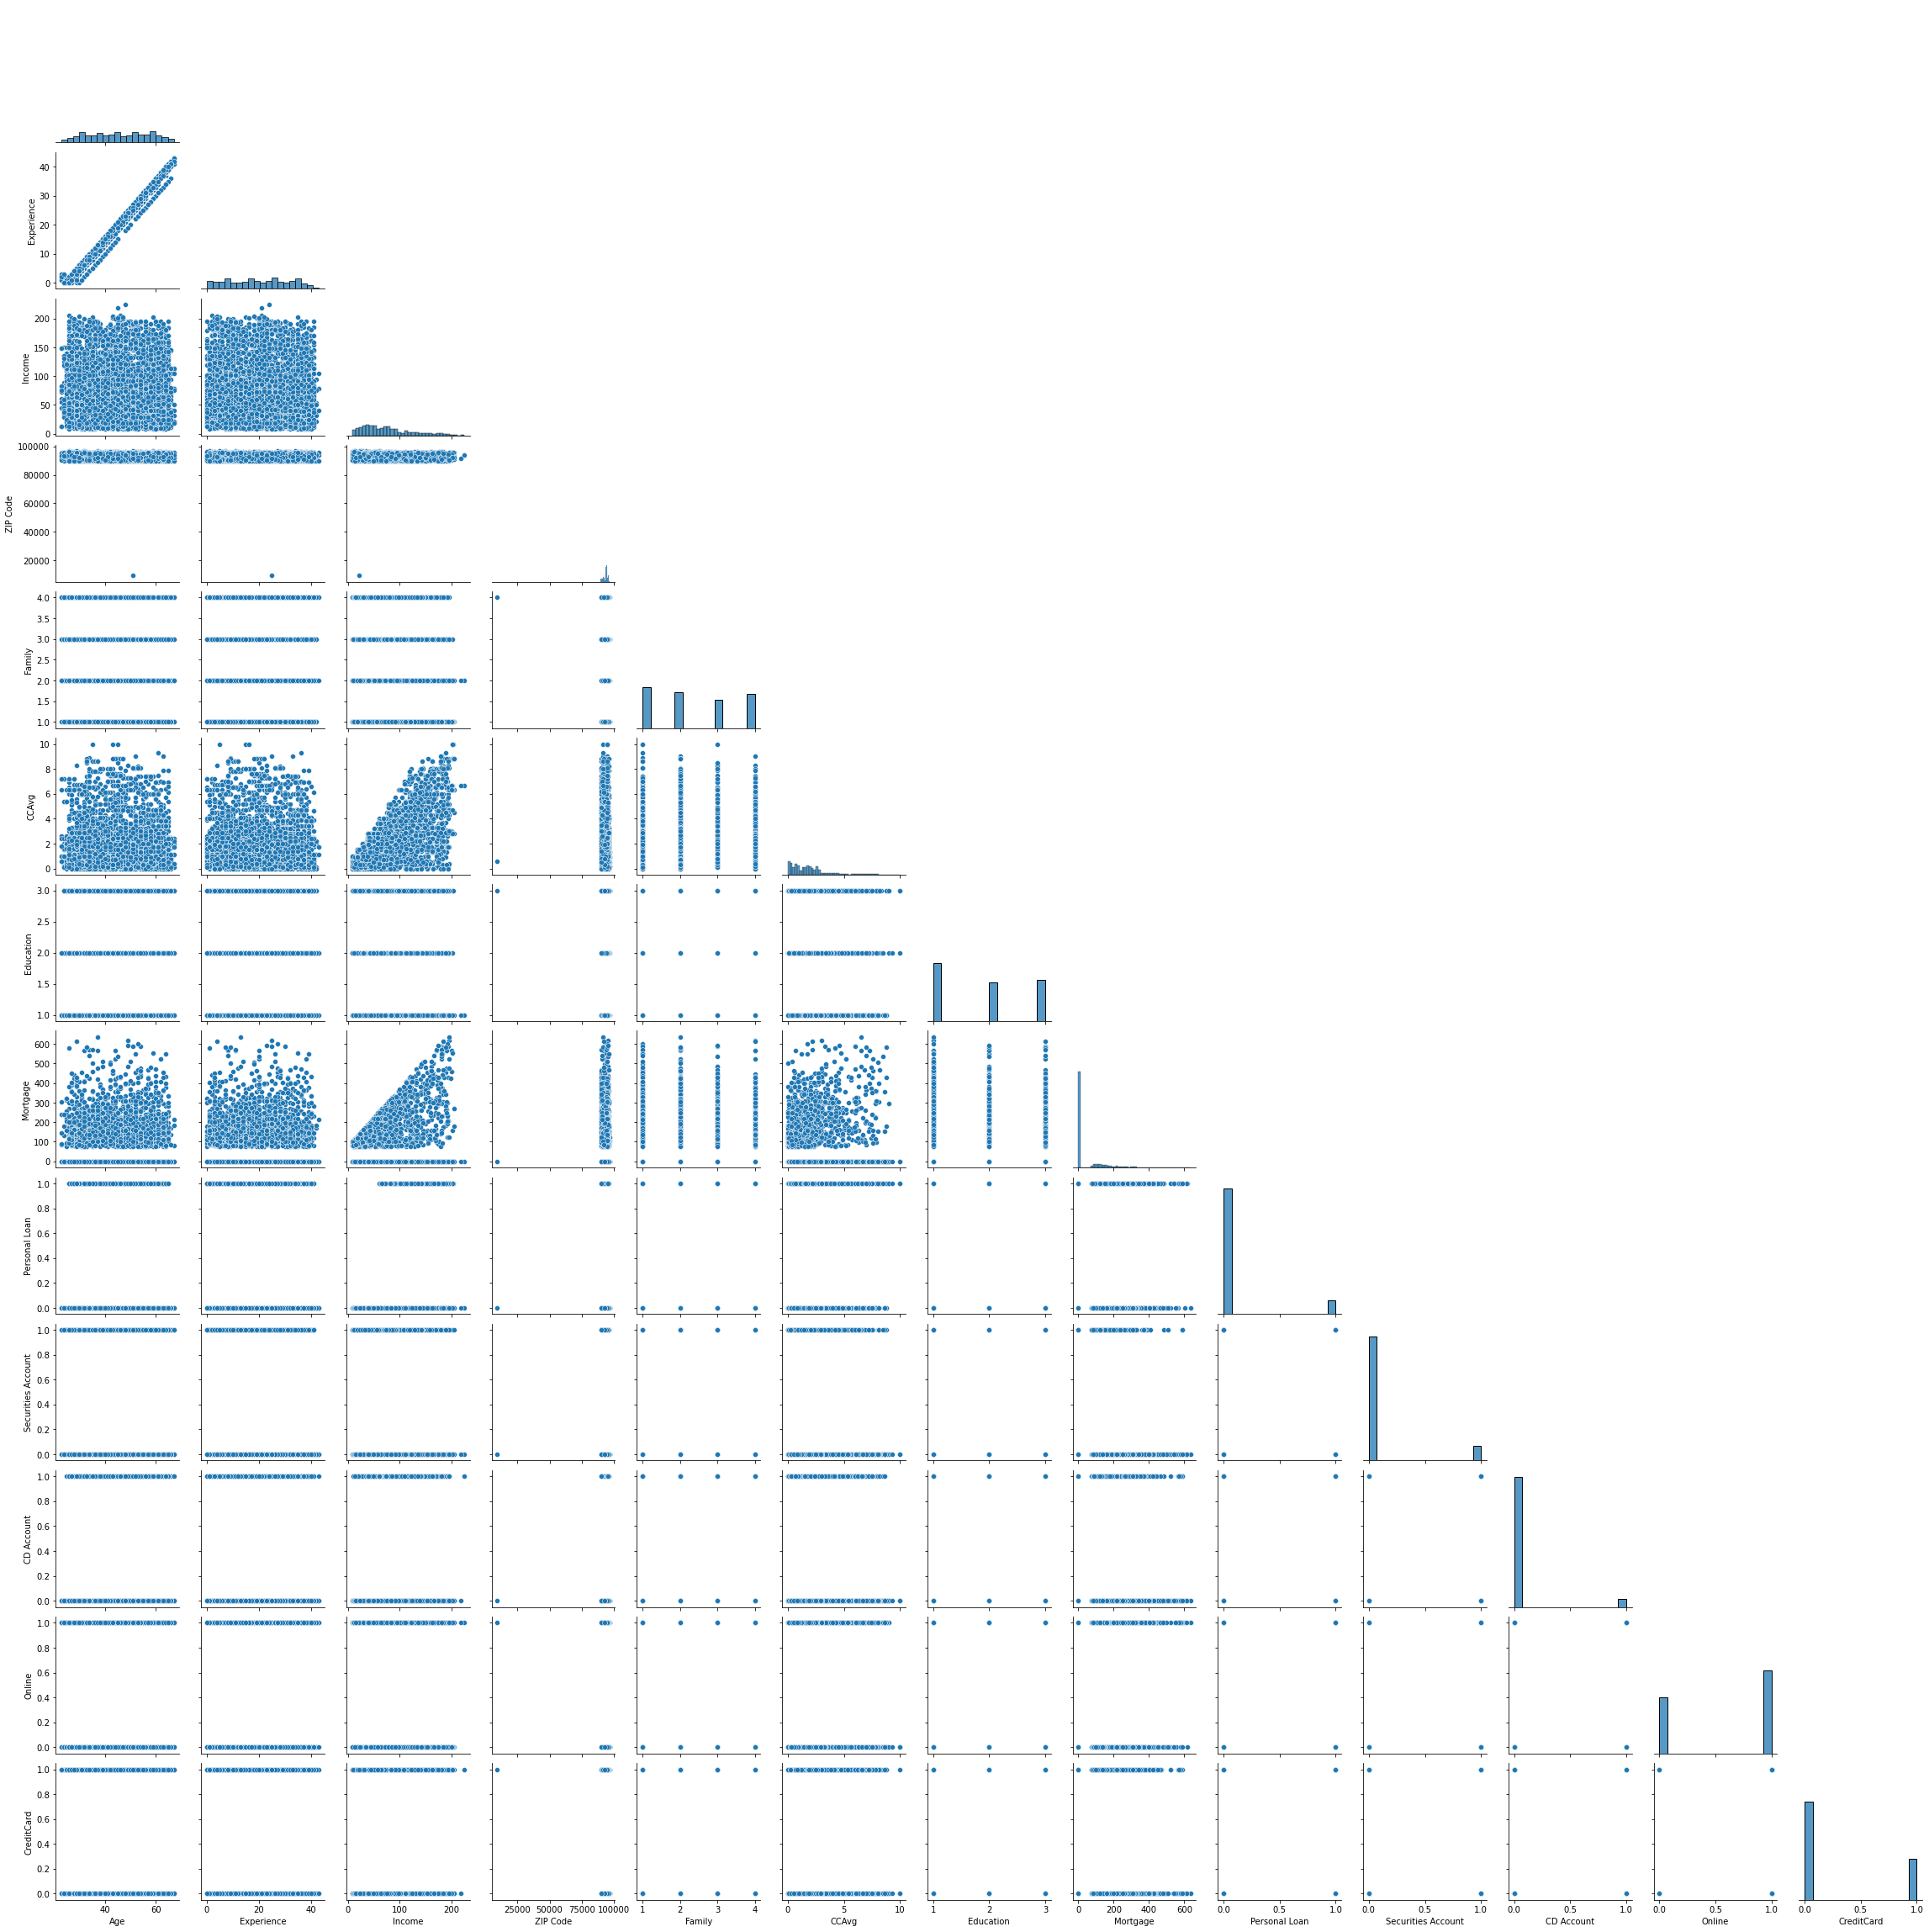

In [20]:
sns.pairplot(df,corner=True)
plt.show()

#### Observations:
- NO relationship with the ZIP Code and other variables.
- 'Age' has very strong and possitive association with 'Experience' 

#### Number of people with zero mortgage?

In [21]:
df[df['Mortgage']==0]['Mortgage'].count()

3462

<b>Observation</b> - Most of the customers do not have mortgage. Zero mortgages for 3462 customers<b>

#### Number of people with zero credit card spending per month?

In [22]:
df[df['CCAvg']==0]['CCAvg'].count()

106

#### Value counts of all categorical columns?

In [23]:
# for i in range(0,len(catcols)):
#     print(df[catcols[i]].value_counts())
#     print()

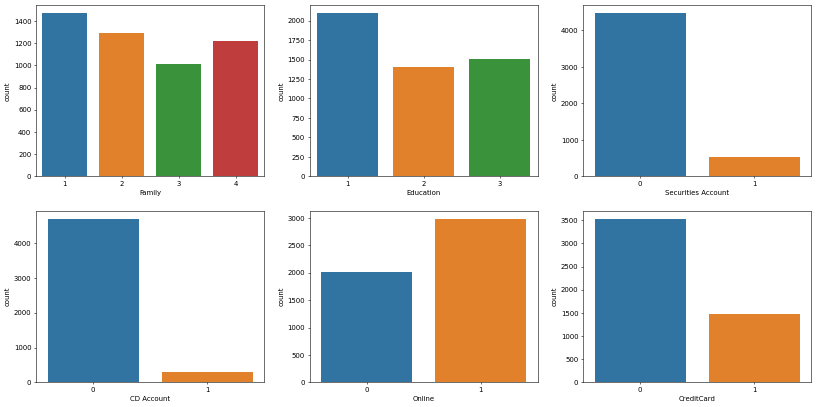

In [24]:
#Analysis of the categorical variables
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(catcols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x= catcols[i],data=df);

#### Observations
- Out of family size from 1 to 4, 1 size is more
- More number of undergrads in the dataset
- very less Securities Accounts with the bank
- very less CD Accounts with the bank
- Less Credit Cards with the bank ie., many customers are not holding credit cards with this bank (<50% have credit cards with bank)
- more individuals using online banking facilities

### Bivariate and Target column distribution with other columns

In [25]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [26]:
df['Personal Loan'].value_counts(normalize=True)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

#### Observation:
    - 90% of individuals have no personal loans with this bank
    - Only 10% individuals have personal loan with bank


In [27]:
# distribution of numerical features in relation with the target variable
df[numcols].groupby(df['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.37,20.17,66.24,1.73,51.79
1,45.07,19.84,144.75,3.91,100.85


#### Observation:
- Avg Income is more than double for individuals who took personal loan with bank
- Credit card monthly spending is also more than double for individuals who took personal loan with bank
- Value of House Mortgage is almost double for individuals who took personal loan with bank

In [28]:
df[catcols].groupby(df['Personal Loan']).agg(lambda x:x.value_counts().index[0])

,Family,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,
0,1,1,0,0,1,0
1,4,3,0,0,1,0


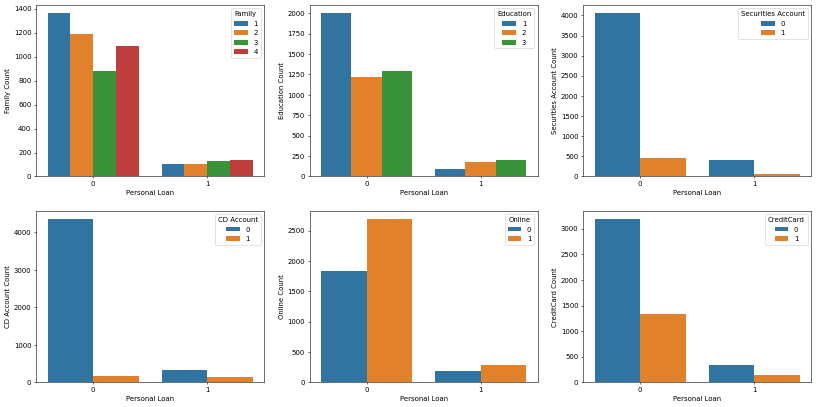

In [29]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(catcols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x='Personal Loan',hue= catcols[i],data=df);
    plt.ylabel(catcols[i] + str(' Count'))

In [30]:
pd.crosstab(df['Family'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


In [31]:
for i in range(0,len(catcols)):
    print(pd.crosstab(df['Personal Loan'],df[catcols[i]],normalize='columns'))

Family           1    2    3    4
Personal Loan                    
0             0.93 0.92 0.87 0.89
1             0.07 0.08 0.13 0.11
Education        1    2    3
Personal Loan               
0             0.96 0.87 0.86
1             0.04 0.13 0.14
Securities Account    0    1
Personal Loan               
0                  0.91 0.89
1                  0.09 0.11
CD Account       0    1
Personal Loan          
0             0.93 0.54
1             0.07 0.46
Online           0    1
Personal Loan          
0             0.91 0.90
1             0.09 0.10
CreditCard       0    1
Personal Loan          
0             0.90 0.90
1             0.10 0.10


**Observation:**
- Family size, Education have no relationship with Personal Loan therfore these can be considered as nominal categorical variables
- Securities Account, Online, CreditCard have similar distribution
- most of the CD Account holders are opting for Personal loan

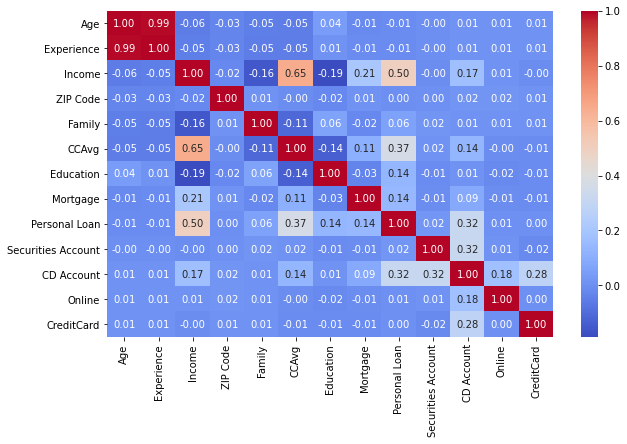

In [32]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f");

#### Observation:
- Age and experience are highly correlated. We can remove one column
- CCAvg and Income also has some sort of +ve correlation
- Income, CCAvg and CD Account have some +ve correlations with Personal loan
- 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


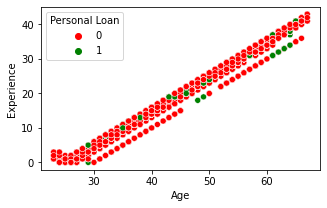

In [33]:
plt.figure(figsize=(5,3))
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['red','green']);

<b>Observation:</b>  'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


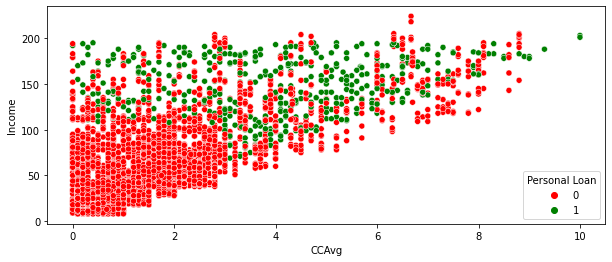

In [34]:
plt.figure(figsize=(10,4))
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green']);

<b>Observation</b>: Individuals who have personal loan have a higher credit card average

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CCAvg Distribution')

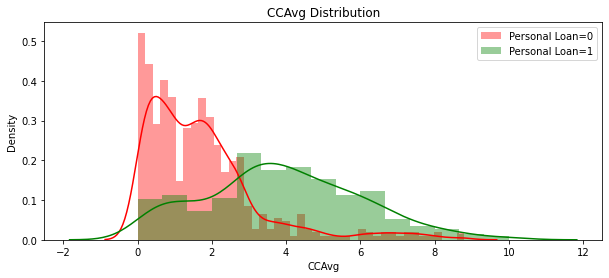

In [35]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

<b>Observation</b>: Customers who have taken personal loan have higher credit card average than those who did not take loan

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

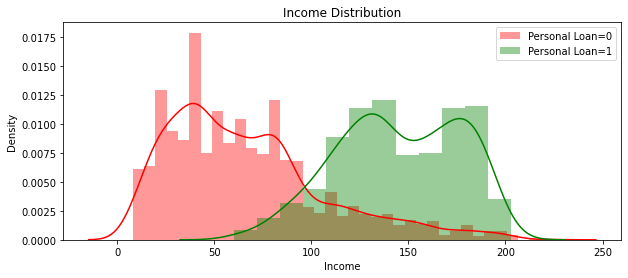

In [36]:
#Income Distribution Vs Personal loan
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

<b>Observation</b>: High income seems to be good predictor of whether or not a customer will take a personal loan

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


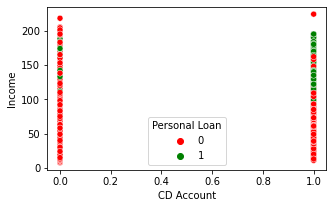

In [37]:
#CD Account Vs Income by Personal loan
plt.figure(figsize=(5,3))
sns.scatterplot(df['CD Account'], df.Income, hue = df['Personal Loan'], palette= ['red','green']);

<b>Observation</b>: Individuals with CD Accounts are having personal loans with bank

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


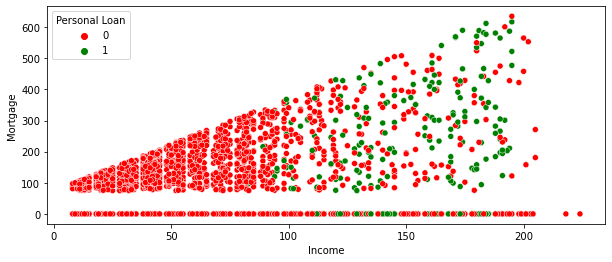

In [38]:
plt.figure(figsize=(10,4))
sns.scatterplot(df.Income, df.Mortgage,hue = df['Personal Loan'], palette= ['red','green']);

<b>Observation</b>: >=100K income individuals with and without mortgages have opted for personal loans with bank

### Model Prepartion steps

In [39]:
#Dropping zipcode as it doesnt have impact on target variable
df = df.drop('ZIP Code', axis=1)
df.shape

(5000, 12)

In [40]:
#dropping 'Experience' column as it is correlated with Age.
df_exp = df.copy()
df = df.drop('Experience', axis=1)
df.shape

(5000, 11)

In [41]:
df_exp['Mortgage'].value_counts()

0      3462
98       17
89       16
91       16
83       16
       ... 
206       1
210       1
258       1
278       1
635       1
Name: Mortgage, Length: 347, dtype: int64

#### Transforming numeric data that is right skewed

In [42]:
## Additional

### New variable extracted from mortgage

df['Mortgage_category'] = df['Mortgage'].apply(lambda x:1 if x>=1 else 0)
# Here, lambda function gives output as 1 whenever 'Mortgage' value is greater than or equal to 1 else it gives 0
## These outputs are stored ina new column 'Mortgage_category'

df['Mortgage_category'] = df['Mortgage_category'].astype('category') # Converting column to 'category' datatype

df['Mortgage_category'].value_counts()

0    3462
1    1538
Name: Mortgage_category, dtype: int64

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

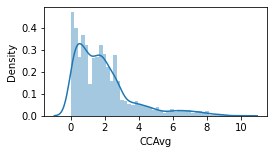

In [43]:
plt.figure(figsize=(4,2))
sns.distplot(df['CCAvg'])

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

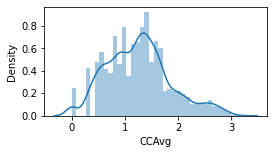

In [44]:
plt.figure(figsize=(4,2))
sns.distplot(np.sqrt(df['CCAvg']))

In [45]:
from scipy.stats import skew 
skew(np.sqrt(df['CCAvg']))

0.4238991859957578

In [46]:
skew(df['CCAvg'])

1.5979637637001873

In [47]:
skew(df['Income'])

0.8410861846424931

In [48]:
skew(np.sqrt(df['Income']))

0.26035759523724794

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

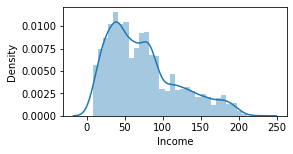

In [49]:
plt.figure(figsize=(4,2))
sns.distplot(df['Income'])

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

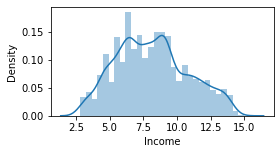

In [50]:
plt.figure(figsize=(4,2))
sns.distplot(np.sqrt(df['Income']))

#### Creating a pipeline for easy transformations for future data

In [51]:
def pipe(df):
    data = df.copy()
    data['Income_sqrt'] = np.sqrt(data['Income'])  # to normalize the distribution
    data['CCAvg_sqrt'] = np.sqrt(data['CCAvg']) # to normalize the distribution
    data['Education'] = data['Education'].replace({1: 'UG', 2: 'G', 3: 'P'}) #converting education to categ
    data = pd.get_dummies(data,drop_first=True) #one hot encoding on Education and Family
    return data.drop(columns=['Mortgage','Income','CCAvg'])

data = pipe(df)

In [52]:
data.shape

(5000, 12)

### Model building

In [53]:
## Define X and Y variables
X=pd.DataFrame()
y=pd.DataFrame()
X = data.drop('Personal Loan',axis=1)
y=data['Personal Loan']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 11)
y train data (3500,)
x test data  (1500, 11)
y test data  (1500,)


In [55]:
y_test.value_counts()

0    1343
1     157
Name: Personal Loan, dtype: int64

#### Applying standardiztion (normalizing the numeric data)

In [56]:
from sklearn.preprocessing import StandardScaler
cols_stnd = ['Age','Income_sqrt', 'CCAvg_sqrt']
# normalize traning set
scaler = StandardScaler()
scaler.fit_transform(X_train[cols_stnd])
X_train.loc[:,cols_stnd] = scaler.transform(X_train[cols_stnd])

# normalize test set
scaler.fit_transform(X_test[cols_stnd])
X_test.loc[:,cols_stnd] = scaler.transform(X_test[cols_stnd])


C:\Users\profe\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\profe\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


**Base Model - Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [58]:
lr.coef_

array([[ 0.14497978,  0.50467156, -0.67199746,  3.14084637, -0.62375142,
        -0.95618135,  2.9801424 ,  0.3693168 ,  0.02624579, -3.30834251,
         0.23224455]])

### model prediction

In [59]:
predict = lr.predict(X_test)
predictProb = lr.predict_proba(X_test)

In [60]:
coef_df = pd.DataFrame(lr.coef_)
coef_df['intercept'] = lr.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,10,intercept
0,0.14,0.50,-0.67,3.14,-0.62,-0.96,2.98,0.37,0.03,-3.31,0.23,-4.44


In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
from sklearn import preprocessing

In [62]:
lr_score = lr.score(X_test,y_test)
lr_acc = accuracy_score(y_test,predict)

In [63]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,predict).ravel()

In [64]:
print('Logistic Regression Model Score: %f'  % lr_score)
print('Logistic Regression Model Accuracy Score  : %f'  % lr_acc)
print('\nTrue Positive           = ', tp)
print('True Negative           = ', tn)
print('False Positive(Type I)  = ', fp)
print('False Negative(Type II) = ', fn)

Logistic Regression Model Score: 0.962000
Logistic Regression Model Accuracy Score  : 0.962000

True Positive           =  108
True Negative           =  1335
False Positive(Type I)  =  8
False Negative(Type II) =  49


In [65]:
precision = tp*100/(tp+fp)
print("Precision is: "+str(precision))

Precision is: 93.10344827586206


<b>Observation: </b>
- *PRECISION* --> Measure of correctiveness in predecting or proportion of +ve cases that were correctly identified 
- ~91% of cases, model correctly identifies the +ve cases of customers accepting

In [66]:
recall = tp*100/(tp+fn)
print("Recall is: " +str(recall))

Recall is: 68.78980891719745


<b>Observation: </b>
- *RECALL* --> Measure of completeness in predecting or proportion of ACTUAL +ve cases that were correctly identified 
- ~71% of cases, model predicts correctly if a correct customer accepts the loan

In [67]:
specificity = tn*100/(tn+fp)
print("Specificity is: " +str(specificity))

Specificity is: 99.40431868950111


<b>Observation: </b>
- *SPECIFICITY* --> Measure of how many observations of false category predicted correctly or proportion of ACTUAL -ve cases that were correctly identified 
- 99% of cases, model predicts correctly that customer will not accept the loan when he is not indented to get one

In [68]:
print("F1 score:" +str((2*precision*recall)/(precision+recall)))

F1 score:79.12087912087911


In [69]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    plt.figure(figsize = (4,3))
    sns.heatmap(cm, annot=True,  fmt='2d', xticklabels = [0,1] , yticklabels = [0,1] ,cmap=plt.cm.copper)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

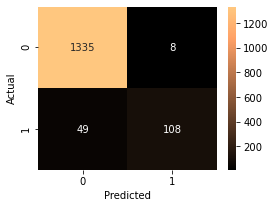

In [70]:
draw_cm(y_test,predict)

##### `Confusion matrix understanding`

*True Positive (Actual=1,predicted=1):* ---- 111

Predicted that personal loan can be offered to customers who will accept it

*False Positive (Actual=0,predicted=1):* ---- 11

Predicted that personal loan can be offered but the customer doesnt want to accept it

*True Negative (Actual=0,predicted=0):* ---- 1332

Predicted that personal loan cannot be offered and the customer doesnt want to accept it

*False Negative (Actual=1,predicted=0):* ---- 46

Predicted that personal loan cannot be offered but the customer wanted it

In [71]:
# Classification Report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.93      0.69      0.79       157

    accuracy                           0.96      1500
   macro avg       0.95      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



#### AUC -ROC curve

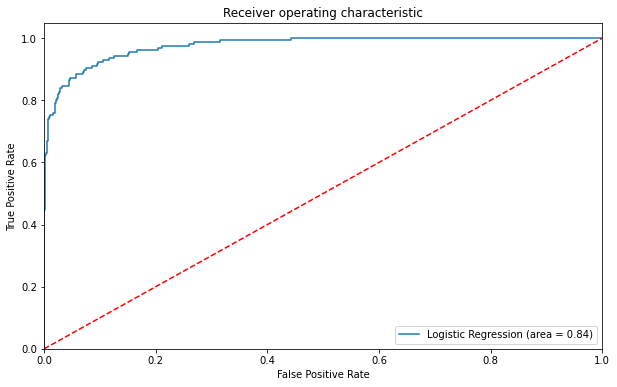

In [72]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<b>Observation</b>
- As AUC is 0.85 it is a good model with no underfitting

### Logit Model

In [73]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

X_train_sm = X_train.copy()
X_train_sm = add_constant(X_train_sm)
logit_model=sm.Logit(y_train,X_train_sm)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.112251
         Iterations 10
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.635      
Dependent Variable:   Personal Loan    AIC:              809.7541   
Date:                 2021-03-31 18:49 BIC:              883.6803   
No. Observations:     3500             Log-Likelihood:   -392.88    
Df Model:             11               LL-Null:          -1077.3    
Df Residuals:         3488             LLR p-value:      6.4594e-287
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -5.1254   0.3982 -12.8706 0.0000 -5.9059 -4.3449
Age                  0.1588

<b>Observation: </b>
- Age, Education_P, Family_2 have p value way greater than 0.05 and so deleting these in the model should not have very less impact

### Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.

In [74]:
#Find out coefficients of all the attributes and show the output in a data frame with column names
coefs = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef']).sort_values(by='coef',ascending=False)
coefs['odds ratio'] = np.exp(coefs['coef'])
coefs.set_index('features', inplace=True)
coefs

,coef,odds ratio
features,,
CD Account,3.14,23.12
Income_sqrt,2.98,19.69
Family,0.50,1.66
CCAvg_sqrt,0.37,1.45
Mortgage_category_1,0.23,1.26
Age,0.14,1.16
Education_P,0.03,1.03
Online,-0.62,0.54
Securities Account,-0.67,0.51


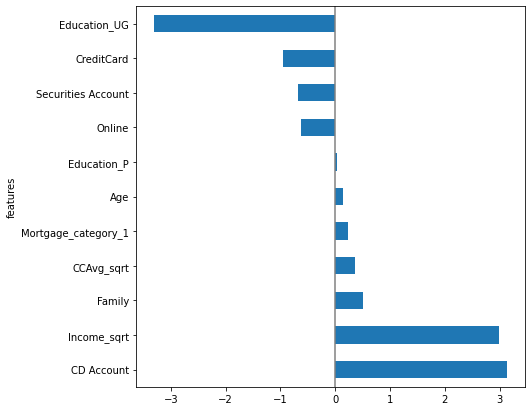

In [75]:
coefs['coef'].plot(kind='barh', figsize=(9, 7))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [76]:
#For test data show all the rows where the predicted class is not equal to the observed class
test_data = pd.DataFrame()
test_data = X_test.copy()
test_data['Actual'] = y_test.copy()
test_data['predicted'] = predict
test_data[test_data['Actual']!=test_data['predicted']]

,Age,Family,Securities Account,CD Account,Online,CreditCard,Income_sqrt,CCAvg_sqrt,Education_P,Education_UG,Mortgage_category_1,Actual,predicted
2586,0.09,4,0,0,0,1,1.49,2.01,0,1,0,1,0
227,0.09,2,0,1,1,1,1.47,2.46,0,1,0,0,1
3456,0.01,2,0,0,1,0,1.11,1.51,1,0,0,1,0
4439,-1.13,2,0,0,0,1,0.75,1.06,1,0,0,1,0
1860,-1.40,3,0,0,1,0,1.92,1.59,0,1,1,1,0
1886,1.67,4,0,0,0,0,0.94,0.07,0,0,0,0,1
2194,-1.05,1,0,0,1,0,1.08,0.01,0,0,0,1,0
1589,0.97,1,0,0,1,0,1.09,-1.35,0,0,0,1,0
2584,1.15,3,0,0,1,0,0.92,1.31,0,0,0,1,0
505,-0.87,3,0,0,1,0,0.05,0.83,0,0,0,1,0


In [77]:
test_data[test_data['Actual']!=test_data['predicted']].shape[0]

57

<b>Obesrvation:</b> There are 57 instances where model predicted wrongly compared to Actual

### conclusion related to the Business understanding of your model

- Goal of the Thera Bank is to convert there liability customers into loan customers.
- They need information about the connection between the variables given in the data and we able to successfully derive conclusions
###### *Important Measures:*
- *PRECISION* --> Measure of correctiveness in predecting or proportion of +ve cases that were correctly identified 
- ~91% of cases, model identifies +ve cases of identifying the customers who opts for personal loan. Here the bank wants to give loan to the people who are willing to accept loan i.e. less number of False Positive, if FP is high bank would lose money in campagning. So that the bank doesn't lose money on the people who are not intrested in taking loan. Hence Precision is an important metric.
- *RECALL* --> Measure of completeness in predecting or proportion of ACTUAL +ve cases that were correctly identified 
- ~71% of cases, model predicts correctly if a correct customer accepts the loan. Recall is also important because bank wants to correctly identify the customers who would take personal loan
- *SPECIFICITY* --> Measure of how many observations of false category predicted correctly or proportion of ACTUAL -ve cases that were correctly identified 
- 99% of cases, model predicts correctly that customer will not accept the loan when he is not indented to get one
###### *Important Features:*
- Based on coefficients, top 5 useful features are Income, CD Account, Family size, CC Avg


##### `Important Metric`

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. **less number of False Negative**, so that bank doesn't lose real customers who want to take loan. Hence the **focus should be on increasing Recall**.

### Additional code to Check for model overfit by running confusion matrix and AUC on Training

In [78]:
# Predicting the train set results
y_train_pred = lr.predict(X_train)
lr_score = lr.score(X_train,y_train)
lr_acc = accuracy_score(y_train,y_train_pred)


In [79]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()

In [80]:
print('Logistic Regression Model Score: %f'  % lr_score)
print('Logistic Regression Model Accuracy Score  : %f'  % lr_acc)
print('\nTrue Positive           = ', tp)
print('True Negative           = ', tn)
print('False Positive(Type I)  = ', fp)
print('False Negative(Type II) = ', fn)

Logistic Regression Model Score: 0.959714
Logistic Regression Model Accuracy Score  : 0.959714

True Positive           =  212
True Negative           =  3147
False Positive(Type I)  =  30
False Negative(Type II) =  111


In [81]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3177
           1       0.88      0.66      0.75       323

    accuracy                           0.96      3500
   macro avg       0.92      0.82      0.86      3500
weighted avg       0.96      0.96      0.96      3500



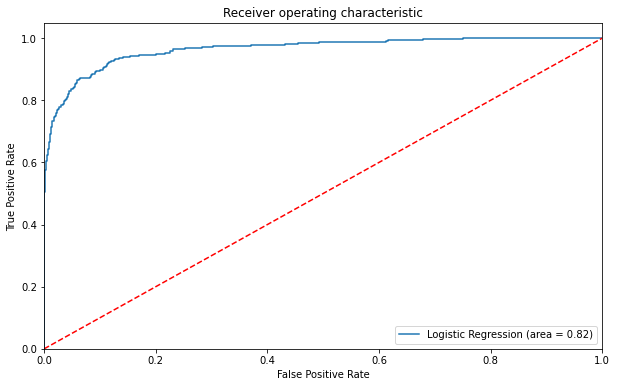

In [82]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, lr.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

<b>Observation: </b>
- As training AUC is 0.83 and testing AUC is 0.85 --> model is not overfitting

(optional) Oversampling the personal loan accept cases as there is imbalance in Target data

Transaction Number x_train dataset:  (3500, 11)
Transaction Number y_train dataset:  (3500,)
Transaction Number x_test dataset:  (1500, 11)
Transaction Number y_test dataset:  (1500,)
Before OverSampling, counts of label '1': 323
Before OverSampling, counts of label '0': 3177 

After OverSampling, the shape of train_x: (6354, 11)
After OverSampling, the shape of train_y: (6354,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:ylabel='count'>

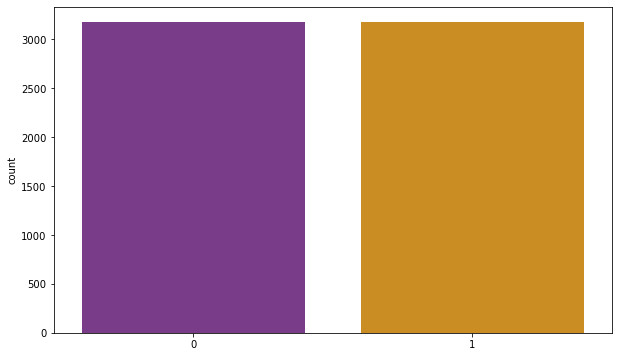

In [83]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, sampling_strategy='minority')
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1343
           1       0.53      0.92      0.67       157

    accuracy                           0.91      1500
   macro avg       0.76      0.91      0.81      1500
weighted avg       0.94      0.91      0.92      1500



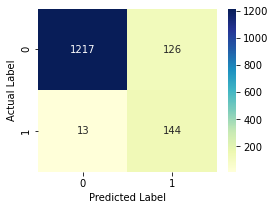

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train_s)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred)) # Recall has increased a lot and AUC is also increased

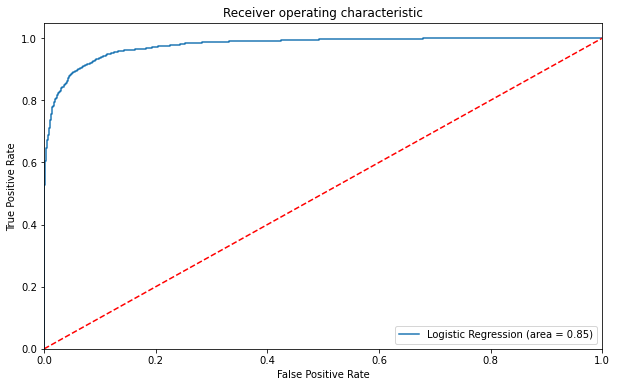

In [85]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_s, lr.predict(X_train_s))
fpr, tpr, thresholds = roc_curve(y_train_s, lr.predict_proba(X_train_s)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_SMOTE')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1343
           1       0.77      0.92      0.84       157

    accuracy                           0.96      1500
   macro avg       0.88      0.95      0.91      1500
weighted avg       0.97      0.96      0.96      1500



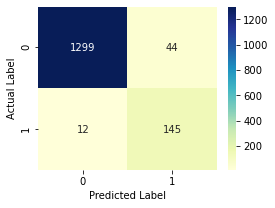

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train_s)
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

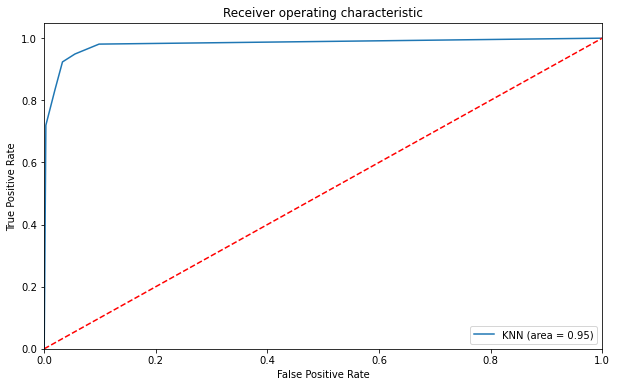

In [87]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC_SMOTE')
plt.show()

**Observation:**
- For Class - 1 --> KNN gave best recall (92%), Precision, f1 score (0.84) and AUC as 95%

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1343
           1       0.57      0.85      0.68       157

    accuracy                           0.92      1500
   macro avg       0.77      0.89      0.82      1500
weighted avg       0.94      0.92      0.92      1500



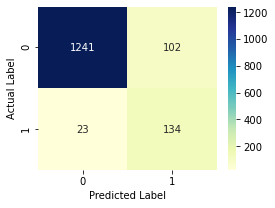

In [88]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train_s, y_train_s)
y_pred = GNB.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

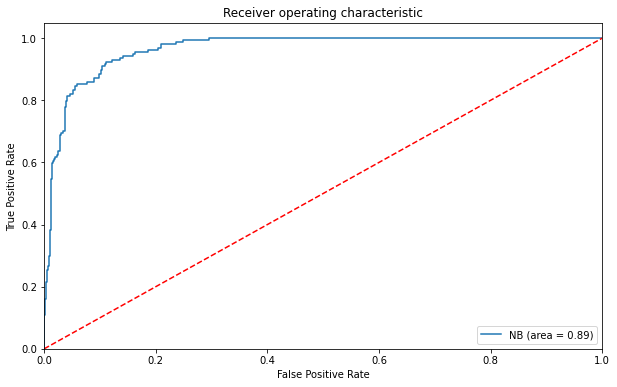

In [89]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC_SMOTE')
plt.show()

### Saving the Model

In [90]:
import pickle

In [91]:
#saving the LR model
with open('mylrmodel','wb') as file:
    pickle.dump(knn,file)

In [92]:
#as I have scaled my features, need to get my scalar object saved as well
with open('lrscalar','wb') as file:
    pickle.dump(scaler,file)